In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np
import cv2
import pydicom
import os
import seaborn as sns
from skimage.segmentation import mark_boundaries
from pathlib import Path

In [2]:
P00001_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL.dcm")
P00001_mask_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00001_LEFT_CC_MASK_1.dcm")
P00001_crop_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00001_LEFT_CC_CROP_1.dcm")

P00444_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00444_LEFT_CC_FULL.dcm")
P00444_mask_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00444_LEFT_CC_MASK_1.dcm")

P00051_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00051_LEFT_MLO_FULL.dcm")
P00051_mask_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00051_LEFT_MLO_MASK_1.dcm")

P00001_arr = P00001_dcm.pixel_array
P00001_mask_arr = P00001_mask_dcm.pixel_array
P00001_crop_arr = P00001_crop_dcm.pixel_array

P00444_arr = P00444_dcm.pixel_array
P00444_mask_arr = P00444_mask_dcm.pixel_array

P00051_arr = P00051_dcm.pixel_array
P00051_mask_arr = P00051_mask_dcm.pixel_array

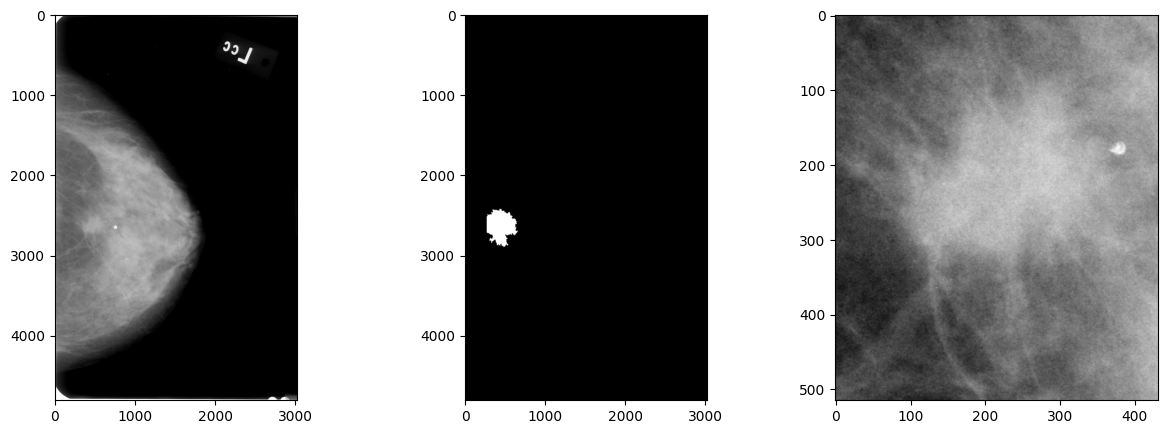

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].imshow(P00001_arr, cmap="gray")
ax[1].imshow(P00001_mask_arr, cmap="gray")
ax[2].imshow(P00001_crop_arr, cmap="gray")

In [4]:
cv2.imwrite("data/Mass/img/Mass-Training_P_00001_LEFT_CC_FULL.png", P00001_arr)
cv2.imwrite("data/Mass/img/Mass-Training_P_00001_LEFT_CC_MASK_1.png", P00001_mask_arr)

cv2.imwrite("data/Mass/img/Mass-Training_P_00444_LEFT_CC_FULL.png", P00444_arr)
cv2.imwrite("data/Mass/img/Mass-Training_P_00444_LEFT_CC_MASK_1.png", P00444_mask_arr)

cv2.imwrite("data/Mass/img/Mass-Training_P_00051_LEFT_MLO_FULL.png", P00051_arr)
cv2.imwrite("data/Mass/img/Mass-Training_P_00051_LEFT_MLO_MASK_1.png", P00051_mask_arr)

False

In [5]:
P00001_img = cv2.imread("data/Mass/img/Mass-Training_P_00001_LEFT_CC_FULL.png", cv2.IMREAD_GRAYSCALE)
P00001_mask = cv2.imread("data/Mass/img/Mass-Training_P_00001_LEFT_CC_MASK_1.png", cv2.IMREAD_GRAYSCALE)

P00444_img = cv2.imread("data/Mass/img/Mass-Training_P_00444_LEFT_CC_FULL.png", cv2.IMREAD_GRAYSCALE)
P00444_mask = cv2.imread("data/Mass/img/Mass-Training_P_00444_LEFT_CC_MASK_1.png", cv2.IMREAD_GRAYSCALE)

P00051_img = cv2.imread("data/Mass/img/Mass-Training_P_00051_LEFT_MLO_FULL.png", cv2.IMREAD_GRAYSCALE)
P00051_mask = cv2.imread("data/Mass/img/Mass-Training_P_00051_LEFT_MLO_MASK_1.png", cv2.IMREAD_GRAYSCALE)

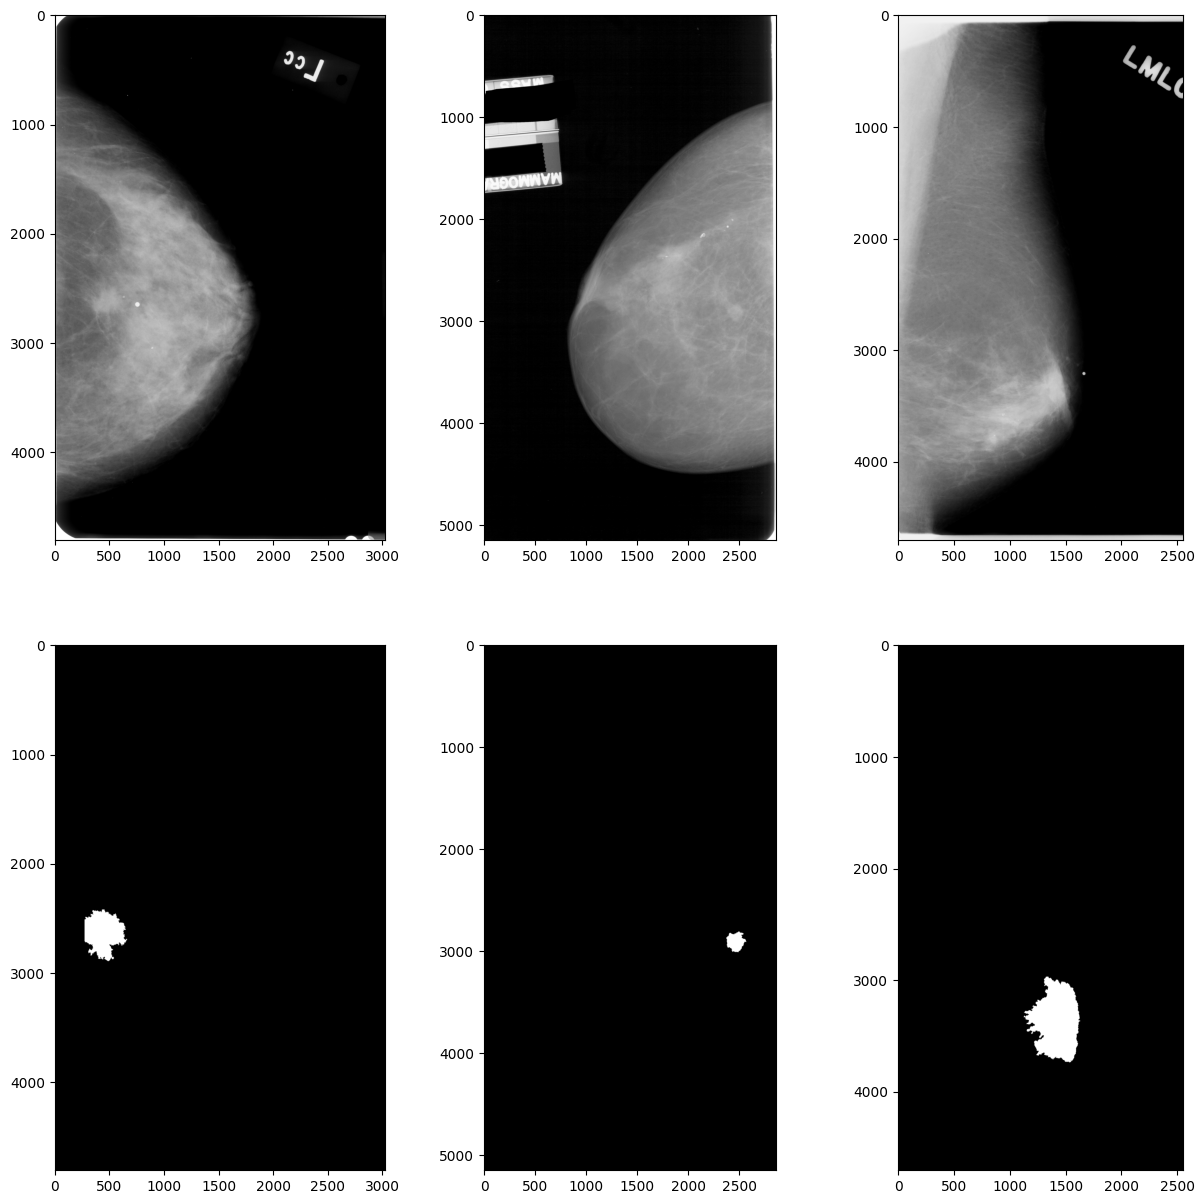

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

ax[0][0].imshow(P00001_arr, cmap="gray")
ax[1][0].imshow(P00001_mask_arr, cmap="gray")

ax[0][1].imshow(P00444_arr, cmap="gray")
ax[1][1].imshow(P00444_mask_arr, cmap="gray")

ax[0][2].imshow(P00051_arr, cmap="gray")
ax[1][2].imshow(P00051_mask_arr, cmap="gray")

In [7]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

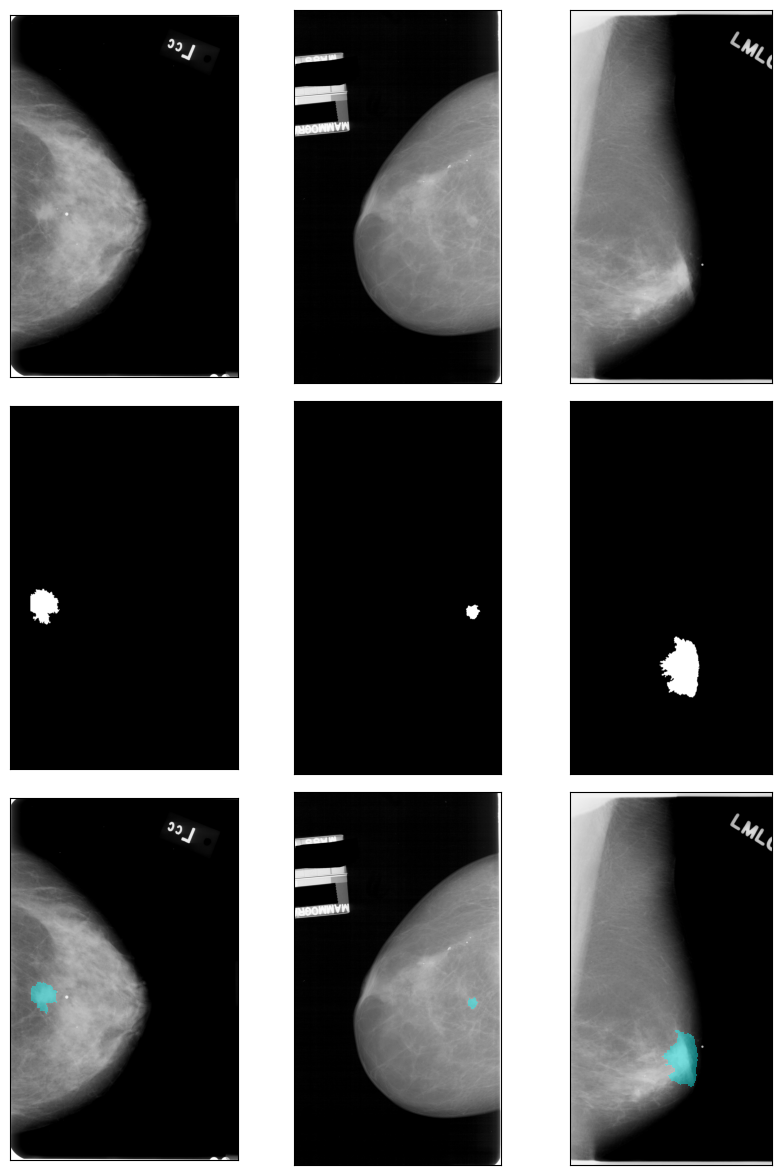

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

ax[0][0].imshow(P00001_arr, cmap="gray")
ax[1][0].imshow(P00001_mask_arr, cmap="gray")

ax[0][1].imshow(P00444_arr, cmap="gray")
ax[1][1].imshow(P00444_mask_arr, cmap="gray")

ax[0][2].imshow(P00051_arr, cmap="gray")
ax[1][2].imshow(P00051_mask_arr, cmap="gray")

bwr_cmap = plt.get_cmap("bwr")
true_cmap = truncate_colormap(cmap=bwr_cmap, minval=0.5, maxval=1.0)
pred_cmap = truncate_colormap(cmap=bwr_cmap, minval=0.5, maxval=0)

P00001_mask_alpha = np.ma.masked_where(P00001_mask_arr == 0, P00001_mask_arr)
P00051_mask_alpha = np.ma.masked_where(P00051_mask_arr == 0, P00051_mask_arr)
P00444_mask_alpha = np.ma.masked_where(P00444_mask_arr == 0, P00444_mask_arr)

ax[2][0].imshow(P00001_arr, cmap="gray")
ax[2][0].imshow(P00001_mask_alpha, cmap="cool", alpha=0.4)
#ax[2][0].imshow(P00001_mask_arr, cmap=true_cmap, alpha=0.4)

ax[2][1].imshow(P00444_arr, cmap="gray")
ax[2][1].imshow(P00444_mask_alpha, cmap="cool", alpha=0.4)
#ax[2][1].imshow(P00444_mask_arr, cmap=true_cmap, alpha=0.4)

ax[2][2].imshow(P00051_arr, cmap="gray")
ax[2][2].imshow(P00051_mask_alpha, cmap="cool", alpha=0.4)
#ax[2][2].imshow(P00051_mask_arr, cmap=true_cmap, alpha=0.4)

for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.subplots_adjust(wspace=0.2, hspace=0.05)

plt.tight_layout


In [10]:
df = pd.read_csv("data/Mass/Updated_Mass_Train.csv")

new_cols = [col.replace(" ", "_") for col in df.columns]
df.columns = new_cols      

In [11]:
df.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
full_path                   0
crop_path                   0
mask_path                   0
dtype: int64

In [12]:
df

patient_id  breast_density left_or_right_breast image_view   
0       P_00001               3                 LEFT         CC  \
1       P_00001               3                 LEFT        MLO   
2       P_00004               3                 LEFT         CC   
3       P_00004               3                 LEFT        MLO   
4       P_00004               3                RIGHT        MLO   
...         ...             ...                  ...        ...   
1313    P_02033               2                RIGHT        MLO   
1314    P_02079               2                RIGHT         CC   
1315    P_02079               2                RIGHT        MLO   
1316    P_02092               2                 LEFT         CC   
1317    P_02092               2                 LEFT        MLO   

      abnormality_id abnormality_type                          mass_shape   
0                  1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION  \
1                  1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   
2                  1             mass            ARCHITECTURAL_DISTORTION   
3                  1             mass            ARCHITECTURAL_DISTORTION   
4                  1             mass                                OVAL   
...              ...              ...                                 ...   
1313               1             mass                           IRREGULAR   
1314               1             mass                               ROUND   
1315               1             mass                               ROUND   
1316               1             mass                           IRREGULAR   
1317               1             mass                           IRREGULAR   

       mass_margins  assessment  pathology  subtlety   
0        SPICULATED           4  MALIGNANT         4  \
1        SPICULATED           4  MALIGNANT         4   
2       ILL_DEFINED           4     BENIGN         3   
3       ILL_DEFINED           4     BENIGN         3   
4     CIRCUMSCRIBED           4     BENIGN         5   
...             ...         ...        ...       ...   
1313    ILL_DEFINED           3  MALIGNANT         4   
1314     SPICULATED           3  MALIGNANT         5   
1315     SPICULATED           3  MALIGNANT         5   
1316     SPICULATED           3  MALIGNANT         2   
1317     SPICULATED           3  MALIGNANT         2   

                                        image_file_path   
0     Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...  \
1     Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2     Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3     Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4     Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   
...                                                 ...   
1313  Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...   
1314  Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...   
1315  Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...   
1316  Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...   
1317  Mass-Training_P_02092_LEFT_MLO/1.3.6.1.4.1.959...   

                                cropped_image_file_path   
0     Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  \
1     Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2     Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3     Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4     Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   
...                                                 ...   
1313  Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....   
1314  Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...   
1315  Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....   
1316  Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...   
1317  Mass-Training_P_02092_LEFT_MLO_1/1.3.6.1.4.1.9...   

                                     ROI_mask_file_path   
0     Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  \
1     Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2     M

In [13]:
for row in df.itertuples():
    print(row.full_path)
    print("="*60)
    print(row.crop_path)
    print("="*60)
    print(row.mask_path)
    print("="*60)

data/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL.dcm
data/Mass/Train/Mass-Training_P_00001_LEFT_CC_CROP_1.dcm
data/Mass/Train/Mass-Training_P_00001_LEFT_CC_MASK_1.dcm
data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_FULL.dcm
data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_CROP_1.dcm
data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_MASK_1.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_CC_FULL.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_CC_CROP_1.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_CC_MASK_1.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_FULL.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_CROP_1.dcm
data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_MASK_1.dcm
data/Mass/Train/Mass-Training_P_00004_RIGHT_MLO_FULL.dcm
data/Mass/Train/Mass-Training_P_00004_RIGHT_MLO_CROP_1.dcm
data/Mass/Train/Mass-Training_P_00004_RIGHT_MLO_MASK_1.dcm
data/Mass/Train/Mass-Training_P_00009_RIGHT_CC_FULL.dcm
data/Mass/Train/Mass-Training_P_00009_RIGHT_CC_CROP_1.dcm
data/Mass/Train/Mass-Training

In [14]:
# Calc

calc_train_df = pd.read_csv("data/Calc/Calc-Train-Description.csv")
calc_test_df = pd.read_csv("data/Calc/Calc-Test-Description.csv")

calc_all_df = pd.concat(objs=[calc_train_df, calc_test_df])

calc_all_df.columns = calc_all_df.columns.str.replace(' ','_')

calc_all_df.drop(columns=["image_file_path", "cropped_image_file_path", "ROI_mask_file_path"], inplace=True)

calc_all_df.insert(loc=0, column="identifier", value=np.nan)
calc_all_df["identifier"] = calc_all_df.apply(lambda x: "_".join([x["patient_id"], x["left_or_right_breast"], x["image_view"]]), axis=1)

# Mass

mass_train_df = pd.read_csv("data/Mass/Mass-Train-Description.csv")
mass_test_df = pd.read_csv("data/Mass/Mass-Test-Description.csv")

mass_all_df = pd.concat(objs=[mass_train_df, mass_test_df])

mass_all_df.columns = mass_all_df.columns.str.replace(' ','_')

mass_all_df.drop(columns=["image_file_path", "cropped_image_file_path", "ROI_mask_file_path"], inplace=True)

mass_all_df.insert(loc=0, column="identifier", value=np.nan)
mass_all_df["identifier"] = mass_all_df.apply(lambda x: "_".join([x["patient_id"], x["left_or_right_breast"], x["image_view"]]), axis=1)

print(calc_all_df.shape)
print(mass_all_df.shape)

(1872, 12)
(1696, 12)


In [15]:
print(len(calc_all_df["identifier"].unique()))
print(len(mass_all_df["identifier"].unique()))

1511
1592


In [16]:
all_df = pd.concat(objs=[calc_all_df, mass_all_df])

In [17]:
all_df.to_csv("all_data.csv", index=False)

In [18]:
calc_set = set(calc_all_df["patient_id"].unique())
mass_set = set(mass_all_df["patient_id"].unique())

both_set = calc_set.intersection(mass_set)
len(both_set)

79

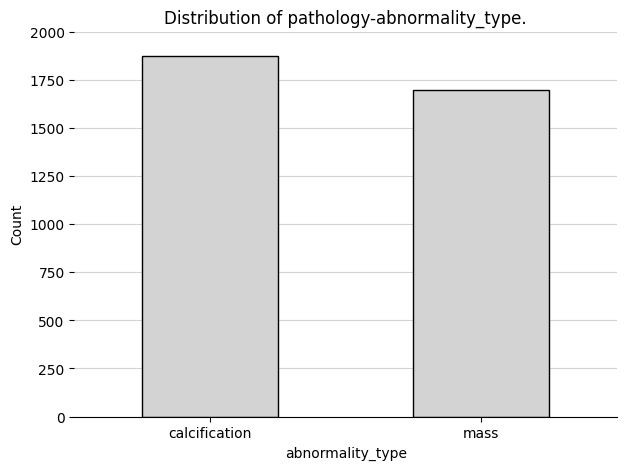

In [19]:
plot_df = all_df["abnormality_type"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")

ax.set_title("Distribution of pathology-abnormality_type.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, ha="center")
ax.yaxis.set_ticks(np.arange(0, 2250, 250))
#ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

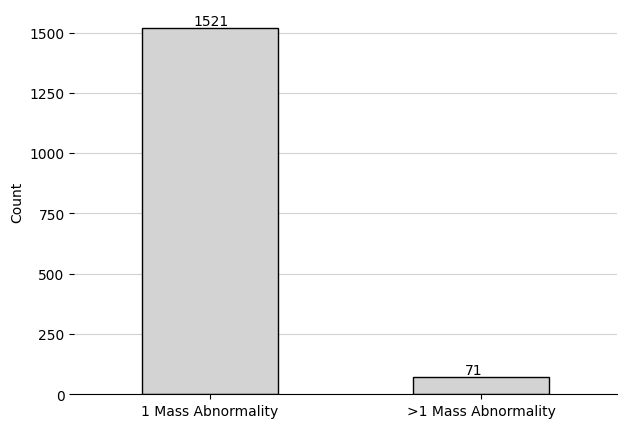

In [20]:
temp = all_df.loc[all_df["abnormality_type"] == "mass"]["identifier"].value_counts()

to_plot_dict = {"1 Mass Abnormality":0, ">1 Mass Abnormality":0}

for count in temp:
    if count > 1:
        to_plot_dict[">1 Mass Abnormality"] += 1
    if count == 1:
        to_plot_dict["1 Mass Abnormality"] += 1

to_plot_series = pd.Series(to_plot_dict)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
to_plot_series.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")

# Add values
for i, v in enumerate(to_plot_series):
    ax.text(x=(i-0.06), y=(v + 10), s=str(v), color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, ha="center")
ax.yaxis.set_ticks(np.arange(0, 1750, 250))
# ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

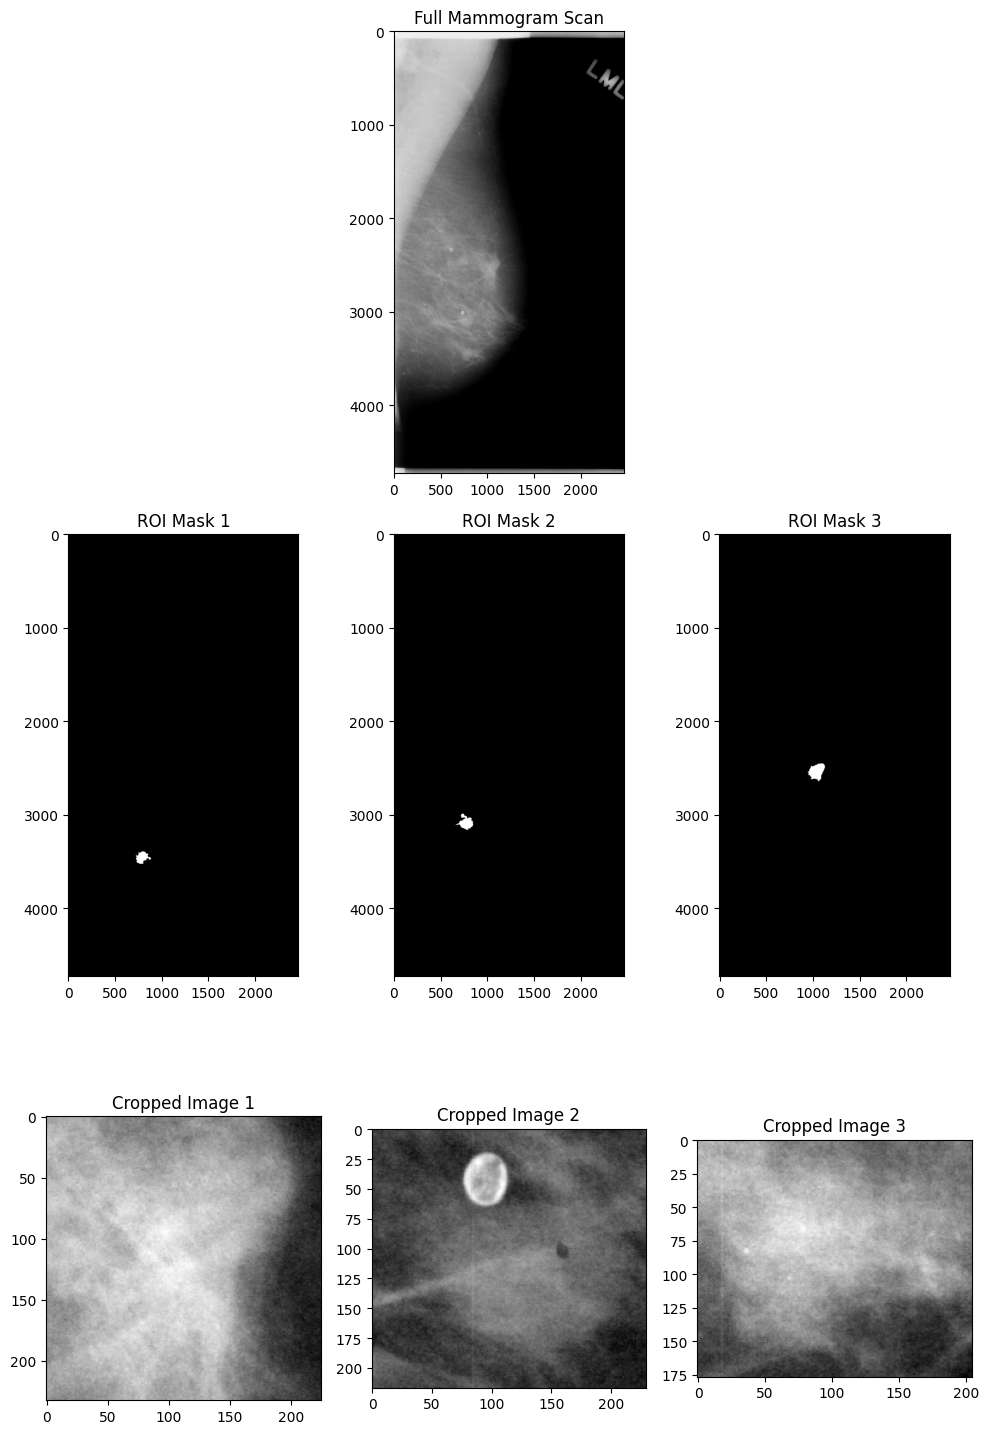

In [21]:
P00207_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_FULL.dcm")
P00207_crop1_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_3.dcm")
P00207_crop2_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_2.dcm")
P00207_crop3_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_1.dcm")
P00207_mask1_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_1.dcm")
P00207_mask2_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_2.dcm")
P00207_mask3_dcm = pydicom.dcmread("data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_3.dcm")

P00207_arr = P00207_dcm.pixel_array
P00207_crop1_arr = P00207_crop1_dcm.pixel_array
P00207_crop2_arr = P00207_crop2_dcm.pixel_array
P00207_crop3_arr = P00207_crop3_dcm.pixel_array
P00207_mask1_arr = P00207_mask1_dcm.pixel_array
P00207_mask2_arr = P00207_mask2_dcm.pixel_array
P00207_mask3_arr = P00207_mask3_dcm.pixel_array

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

ax[0][1].imshow(P00207_arr, cmap="gray")
ax[1][0].imshow(P00207_mask1_arr, cmap="gray")
ax[1][1].imshow(P00207_mask2_arr, cmap="gray")
ax[1][2].imshow(P00207_mask3_arr, cmap="gray")
ax[2][0].imshow(P00207_crop1_arr, cmap="gray")
ax[2][1].imshow(P00207_crop2_arr, cmap="gray")
ax[2][2].imshow(P00207_crop3_arr, cmap="gray")

ax[0][0].axis('off')
ax[0][2].axis('off')

ax[0][1].set_title("Full Mammogram Scan")
ax[1][0].set_title("ROI Mask 1")
ax[1][1].set_title("ROI Mask 2")
ax[1][2].set_title("ROI Mask 3")
ax[2][0].set_title("Cropped Image 1")
ax[2][1].set_title("Cropped Image 2")
ax[2][2].set_title("Cropped Image 3")

plt.tight_layout()
plt.savefig("data/img/more_than_one_abnorm_example_P00207.png", dpi=300, transparent=True)

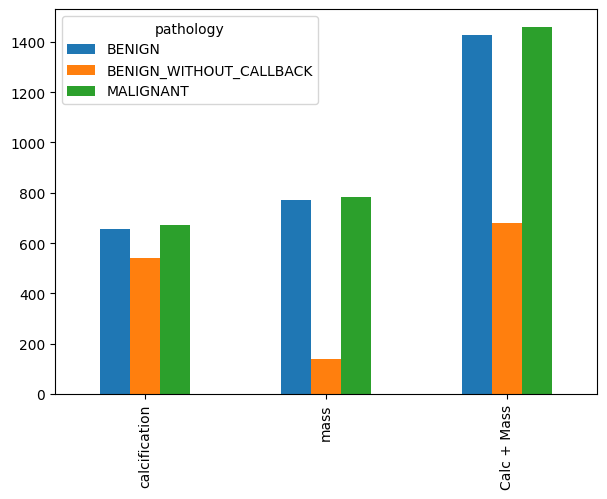

In [22]:
plot_df = all_df.groupby(["abnormality_type"])["pathology"].value_counts().unstack()
new_row = plot_df.loc["calcification"] + plot_df.loc["mass"]
new_row.name = "Calc + Mass"
plot_df = pd.concat([plot_df, new_row.to_frame().T], ignore_index=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax)

plt.show()

In [23]:
path_ab_dict = {
    "benign-calc":0,
    "benign-mass":0,
    "malignant-calc":0,
    "malignant-mass":0
}

for row in all_df.itertuples():
    
    pathology = row.pathology
    ab_type = row.abnormality_type
    
    if pathology=="BENIGN" and ab_type=="calcification":
        path_ab_dict["benign-calc"] += 1
    elif pathology=="BENIGN" and ab_type=="mass":
        path_ab_dict["benign-mass"] += 1
    elif pathology=="MALIGNANT" and ab_type=="calcification":
        path_ab_dict["malignant-calc"] += 1
    elif pathology=="MALIGNANT" and ab_type=="mass":
        path_ab_dict["malignant-mass"] += 1

In [24]:
path_ab_df = pd.DataFrame.from_dict(data=path_ab_dict, orient="index")
path_ab_df

0
benign-calc     658
benign-mass     771
malignant-calc  673
malignant-mass  784

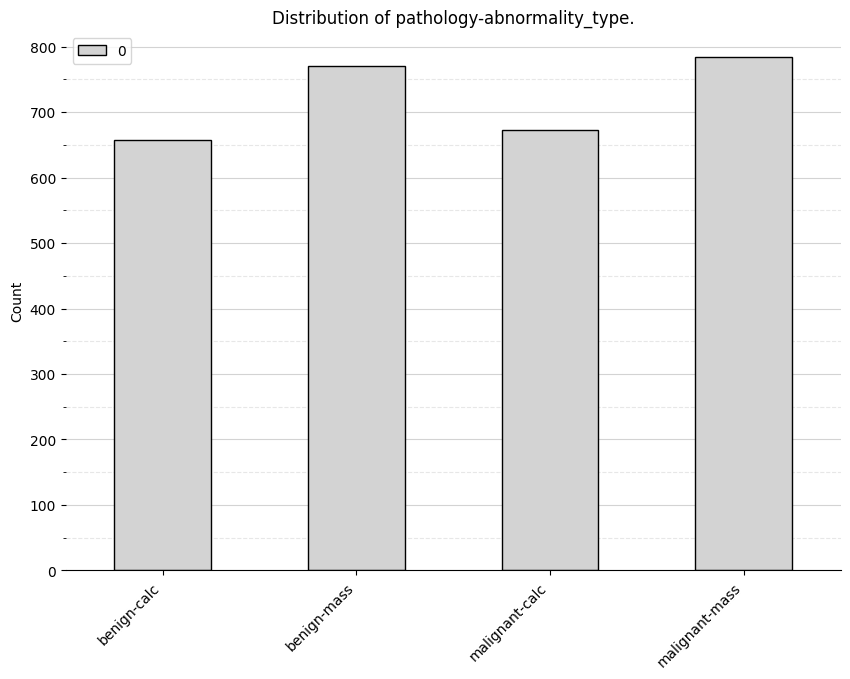

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))


path_ab_df.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")
    
ax.set_title("Distribution of pathology-abnormality_type.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 850, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

<Axes: >

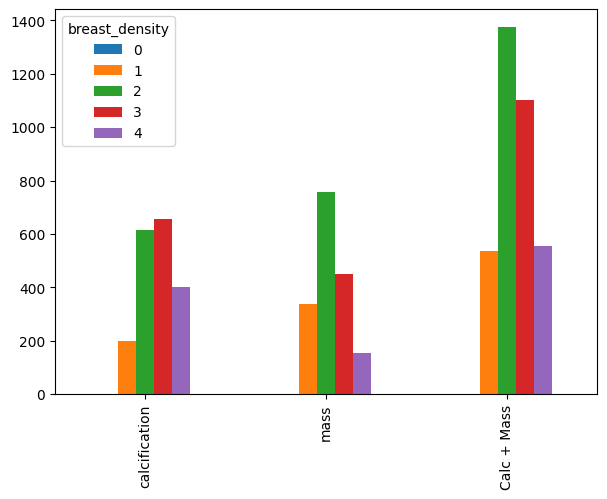

In [26]:
plot_df = all_df.groupby(["abnormality_type"])["breast_density"].value_counts().unstack()
new_row = plot_df.loc["calcification"] + plot_df.loc["mass"]
new_row.name = "Calc + Mass"

plot_df = pd.concat([plot_df, new_row.to_frame().T], ignore_index=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax)

In [27]:
all_df[(all_df["breast_density"]==4) & (all_df["abnormality_type"]=="calcification")].head(30)

identifier patient_id  breast_density left_or_right_breast   
2      P_00007_LEFT_CC    P_00007               4                 LEFT  \
3     P_00007_LEFT_MLO    P_00007               4                 LEFT   
26   P_00013_RIGHT_MLO    P_00013               4                RIGHT   
27     P_00014_LEFT_CC    P_00014               4                 LEFT   
28    P_00014_LEFT_MLO    P_00014               4                 LEFT   
29     P_00016_LEFT_CC    P_00016               4                 LEFT   
30    P_00016_LEFT_MLO    P_00016               4                 LEFT   
31   P_00019_RIGHT_MLO    P_00019               4                RIGHT   
32    P_00019_RIGHT_CC    P_00019               4                RIGHT   
37     P_00024_LEFT_CC    P_00024               4                 LEFT   
38    P_00024_LEFT_MLO    P_00024               4                 LEFT   
39    P_00028_LEFT_MLO    P_00028               4                 LEFT   
48     P_00031_LEFT_CC    P_00031               4                 LEFT   
62    P_00049_RIGHT_CC    P_00049               4                RIGHT   
63   P_00049_RIGHT_MLO    P_00049               4                RIGHT   
74    P_00083_RIGHT_CC    P_00083               4                RIGHT   
79     P_00088_LEFT_CC    P_00088               4                 LEFT   
80    P_00088_LEFT_MLO    P_00088               4                 LEFT   
83     P_00098_LEFT_CC    P_00098               4                 LEFT   
84    P_00098_LEFT_MLO    P_00098               4                 LEFT   
85    P_00098_LEFT_MLO    P_00098               4                 LEFT   
86    P_00098_RIGHT_CC    P_00098               4                RIGHT   
87   P_00098_RIGHT_MLO    P_00098               4                RIGHT   
88   P_00098_RIGHT_MLO    P_00098               4                RIGHT   
127  P_00151_RIGHT_MLO    P_00151               4                RIGHT   
135   P_00161_LEFT_MLO    P_00161               4                 LEFT   
140   P_00181_RIGHT_CC    P_00181               4                RIGHT   
141  P_00181_RIGHT_MLO    P_00181               4                RIGHT   
148    P_00189_LEFT_CC    P_00189               4                 LEFT   
149   P_00189_LEFT_MLO    P_00189               4                 LEFT   

    image_view  abnormality_id abnormality_type   
2           CC               1    calcification  \
3          MLO               1    calcification   
26         MLO               1    calcification   
27          CC               1    calcification   
28         MLO               1    calcification   
29          CC               2    calcification   
30         MLO               2    calcification   
31         MLO               1    calcification   
32          CC               1    calcification   
37          CC               1    calcification   
38         MLO               1    calcification   
39         MLO               1    calcification   
48          CC               1    calcification   
62          CC               1    calcification   
63         MLO               1    calcification   
74          CC               1    calcification   
79          CC               1    calcification   
80         MLO               1    calcification   
83          CC               1    calcification   
84         MLO               1    calcification   
85         MLO               2    calcification   
86          CC               1    calcification   
87         MLO               1    calcification   
88         MLO               2    calcification   
127        MLO               1    calcification   
135        MLO               1    calcification   
140         CC               1    calcification   
141        MLO               1    calcification   
148         CC               1    calcification   
149        MLO               1    calcification   

                                             calc_type calc_distribution   
2                                          PLEOMORPHIC     

In [28]:
density_1 = [
    "data/Calc/Train/Calc-Training_P_00008_LEFT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00048_RIGHT_MLO_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00271_LEFT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00021_LEFT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00080_RIGHT_MLO_FULL.dcm"
]
density_1_ds = [pydicom.dcmread(path) for path in density_1]
density_1_arr = [_ds.pixel_array for _ds in density_1_ds]


density_2 = [
    "data/Mass/Train/Mass-Training_P_00018_RIGHT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00051_LEFT_MLO_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00079_RIGHT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00012_LEFT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00159_LEFT_MLO_FULL.dcm"
]
density_2_ds = [pydicom.dcmread(path) for path in density_2]
density_2_arr = [_ds.pixel_array for _ds in density_2_ds]


density_3 = [
    "data/Calc/Train/Calc-Training_P_00005_RIGHT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00084_LEFT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00105_LEFT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00068_RIGHT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00134_LEFT_CC_FULL.dcm"
]
density_3_ds = [pydicom.dcmread(path) for path in density_3]
density_3_arr = [_ds.pixel_array for _ds in density_3_ds]


density_4 = [
    "data/Mass/Train/Mass-Training_P_00045_LEFT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00172_LEFT_CC_FULL.dcm",
    "data/Mass/Train/Mass-Training_P_00444_LEFT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00031_LEFT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00181_RIGHT_MLO_FULL.dcm"
]
density_4_ds = [pydicom.dcmread(path) for path in density_4]
density_4_arr = [_ds.pixel_array for _ds in density_4_ds]

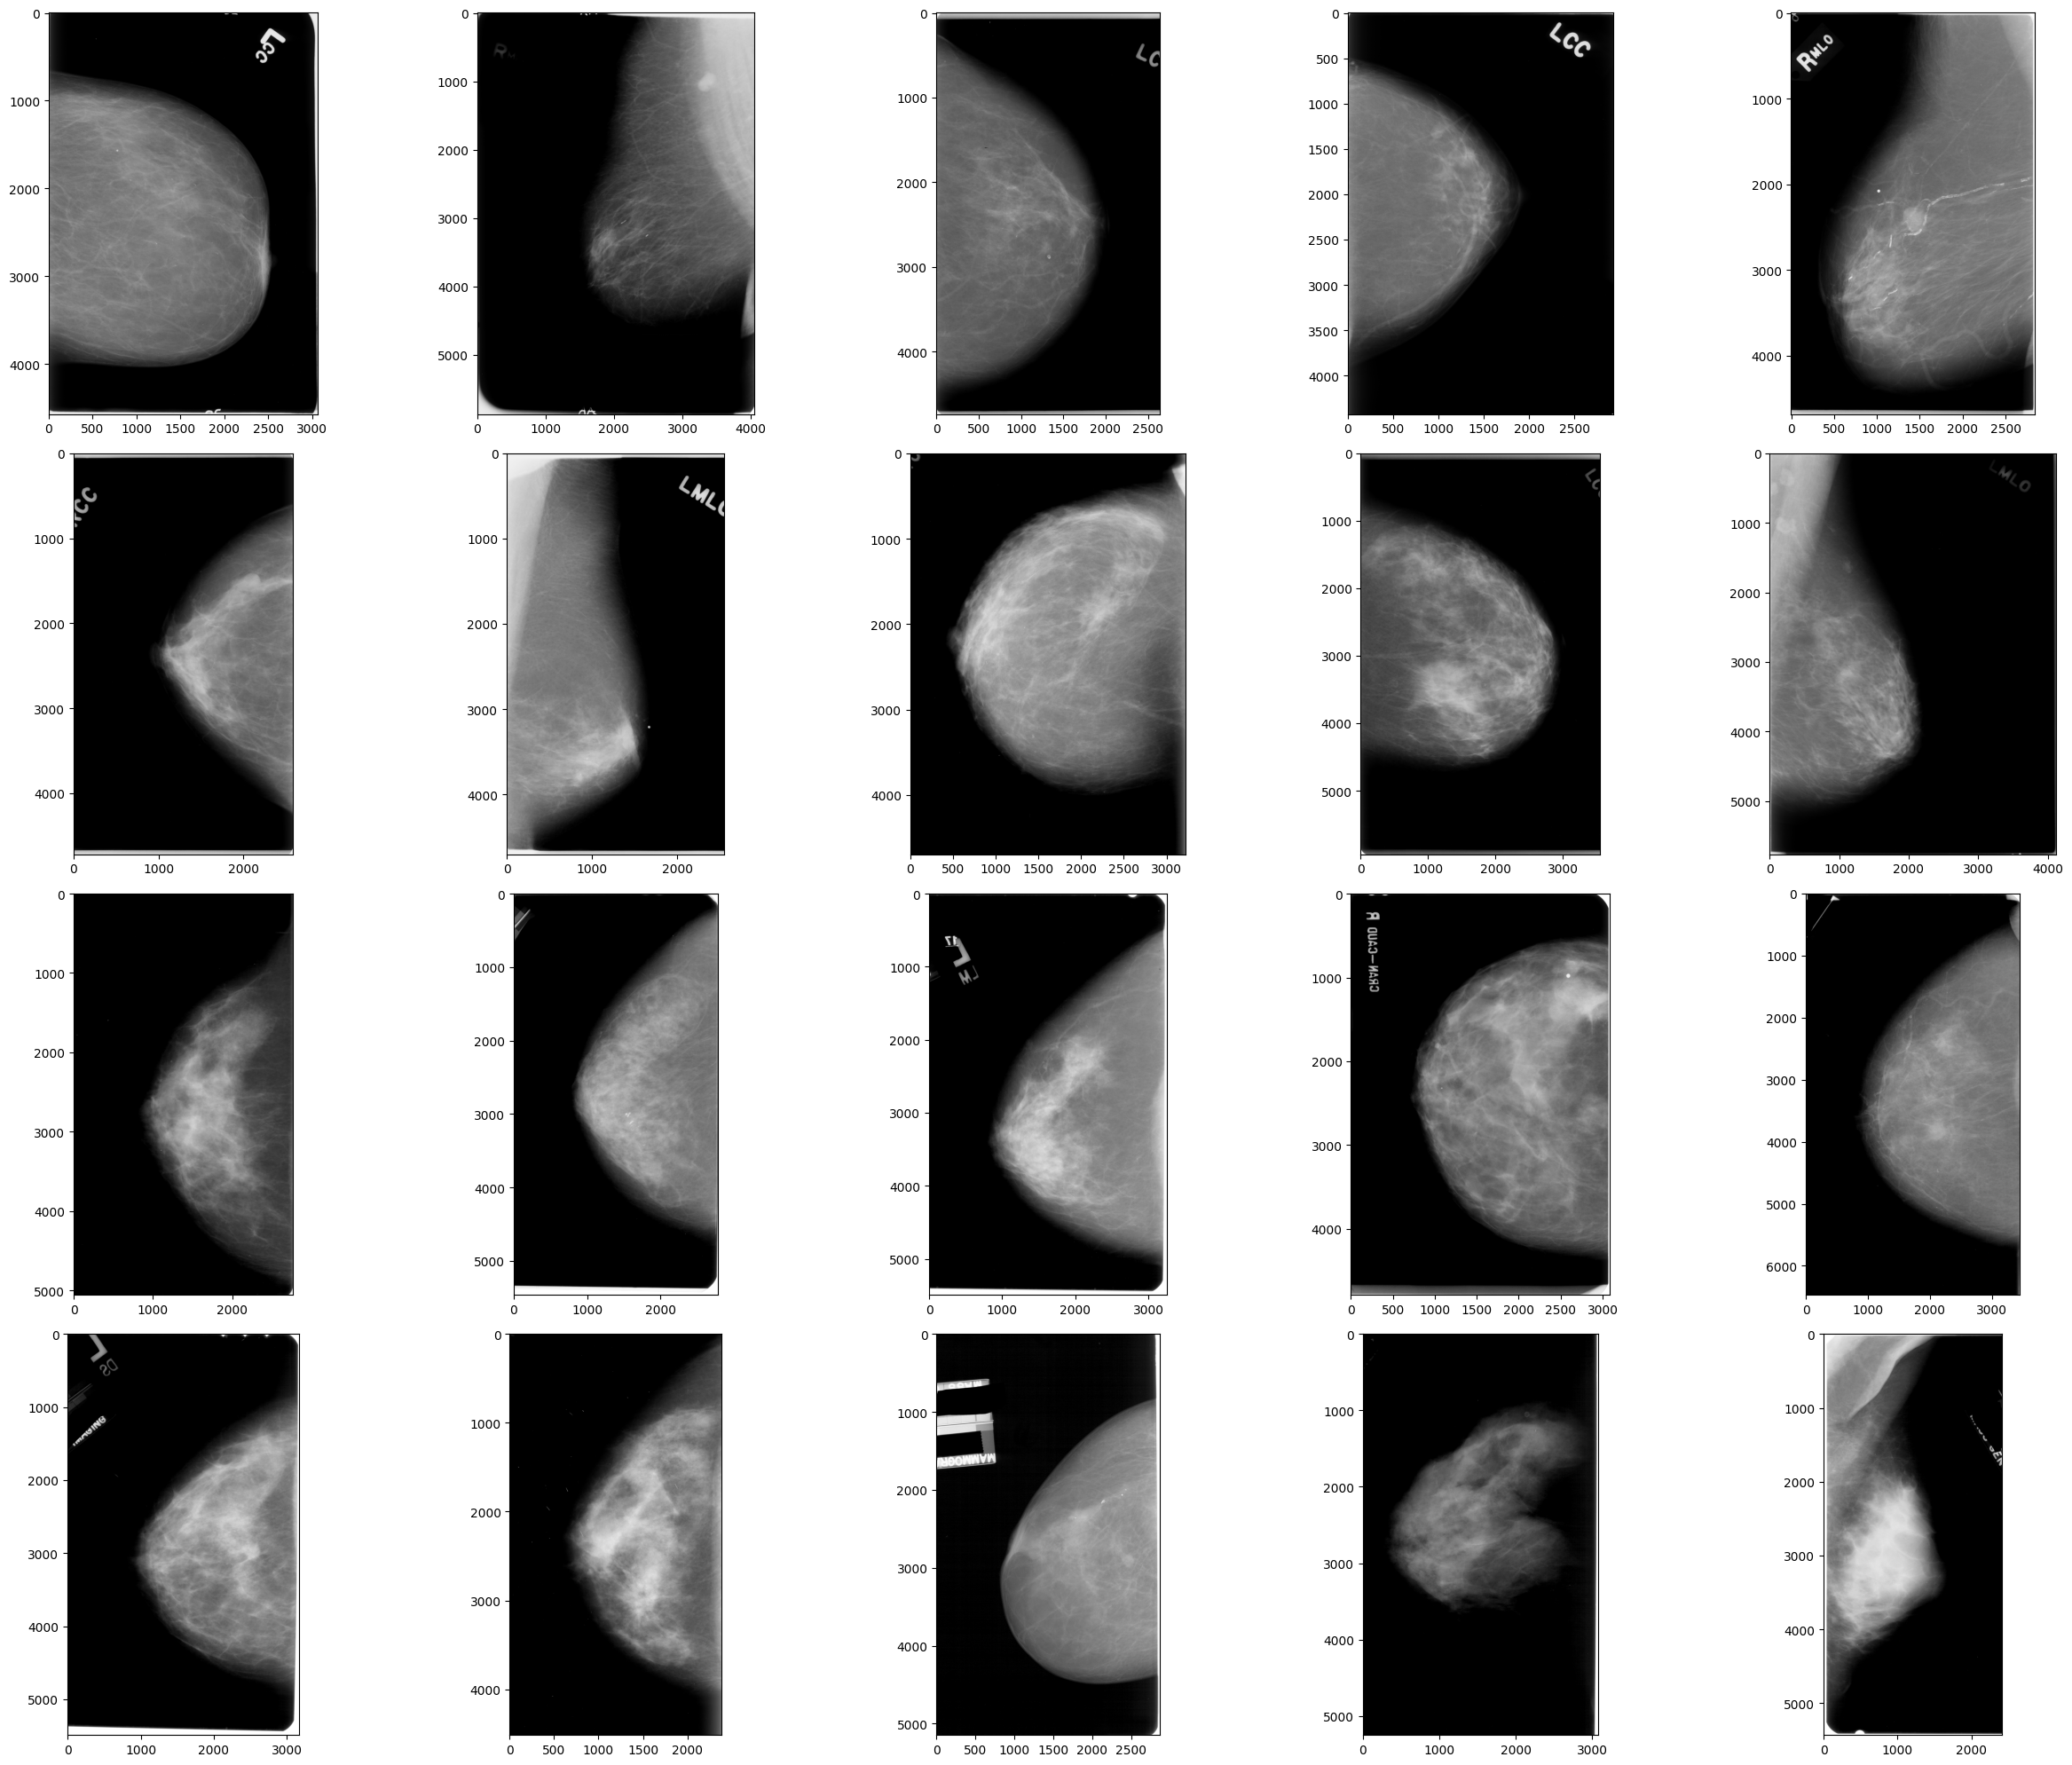

In [29]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))

for i in range(5):
    ax[0][i].imshow(density_1_arr[i], cmap="gray")
    ax[1][i].imshow(density_2_arr[i], cmap="gray")
    ax[2][i].imshow(density_3_arr[i], cmap="gray")
    ax[3][i].imshow(density_4_arr[i], cmap="gray")
    
plt.tight_layout()

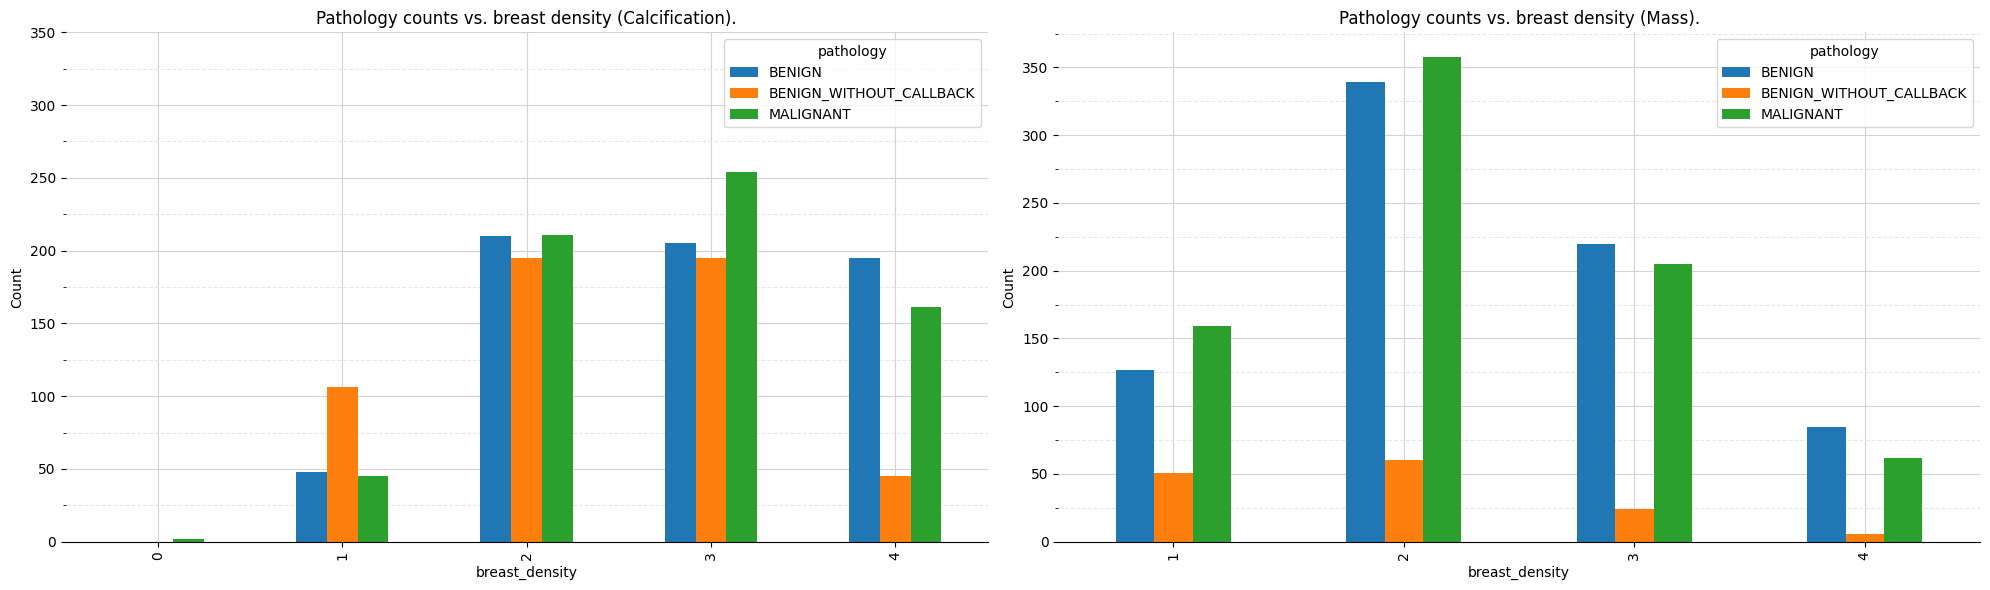

In [30]:
calc_plot = calc_all_df.groupby(["breast_density"])["pathology"].value_counts().unstack()
mass_plot = mass_all_df.groupby(["breast_density"])["pathology"].value_counts().unstack()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
calc_plot.plot.bar(ax=ax[0])
mass_plot.plot.bar(ax=ax[1])

ax[0].set_title("Pathology counts vs. breast density (Calcification).")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].grid(which="major", axis="both", color="#d3d3d3", linestyle="-")
ax[0].grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax[0].set_ylabel("Count")
ax[0].yaxis.set_ticks(np.arange(0, 400, 50))
ax[0].yaxis.set_minor_locator(MultipleLocator(25))
ax[0].patch.set_alpha(0)
ax[0].set_axisbelow(True)

ax[1].set_title("Pathology counts vs. breast density (Mass).")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].grid(which="major", axis="both", color="#d3d3d3", linestyle="-")
ax[1].grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax[1].set_ylabel("Count")
ax[1].yaxis.set_ticks(np.arange(0, 400, 50))
ax[1].yaxis.set_minor_locator(MultipleLocator(25))
ax[1].patch.set_alpha(0)
ax[1].set_axisbelow(True)

plt.tight_layout()

In [31]:
mass_shapes = [shape for shape in mass_all_df["mass_shape"].unique() if str(shape) != "nan"]
mass_shapes

['IRREGULAR-ARCHITECTURAL_DISTORTION',
 'ARCHITECTURAL_DISTORTION',
 'OVAL',
 'IRREGULAR',
 'LYMPH_NODE',
 'LOBULATED-LYMPH_NODE',
 'LOBULATED',
 'FOCAL_ASYMMETRIC_DENSITY',
 'ROUND',
 'LOBULATED-ARCHITECTURAL_DISTORTION',
 'ASYMMETRIC_BREAST_TISSUE',
 'LOBULATED-IRREGULAR',
 'OVAL-LYMPH_NODE',
 'LOBULATED-OVAL',
 'ROUND-OVAL',
 'IRREGULAR-FOCAL_ASYMMETRIC_DENSITY',
 'ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION',
 'ROUND-LOBULATED',
 'OVAL-LOBULATED',
 'IRREGULAR-ASYMMETRIC_BREAST_TISSUE']

In [32]:
mass_all_df["mass_shape"].isnull().sum()

4

In [33]:
mass_shape_singlelabel = [shape for shape in mass_shapes if "-" not in shape]
mass_shape_singlelabel

['ARCHITECTURAL_DISTORTION',
 'OVAL',
 'IRREGULAR',
 'LYMPH_NODE',
 'LOBULATED',
 'FOCAL_ASYMMETRIC_DENSITY',
 'ROUND',
 'ASYMMETRIC_BREAST_TISSUE']

C:\Users\b3nni\AppData\Local\Temp\ipykernel_10756\2279530182.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")


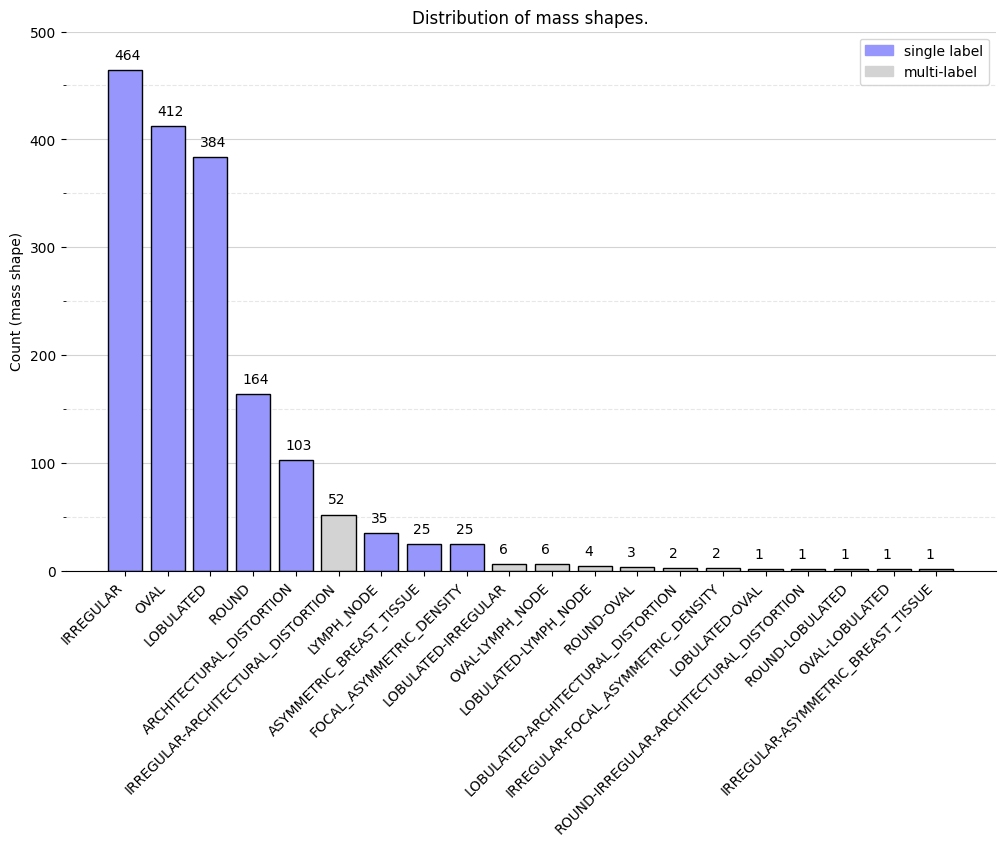

In [34]:
plot_df = mass_all_df["mass_shape"].value_counts().to_frame()

# Create colour dictionary
color_dict = dict((shape, "#d3d3d3") for shape in mass_shapes)
for k, v in color_dict.items():
    if k in mass_shape_singlelabel:
        color_dict[k] = "#9696fd"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

for row in plot_df.itertuples():
    ax.bar(x=row.Index, height=row.count, color=color_dict[row.Index], edgecolor="black")

# Plot values
for i, v in enumerate(plot_df["count"]):
    ax.text(x=(i-0.25), y=(v + 10), s=str(v), color="black")
    
ax.set_title("Distribution of mass shapes.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (mass shape)")
ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 550, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

# Add legend
colors = {"single label": "#9696fd", "multi-label":"#d3d3d3"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

# Get axis for next plot
x_labels = list(plot_df.index)

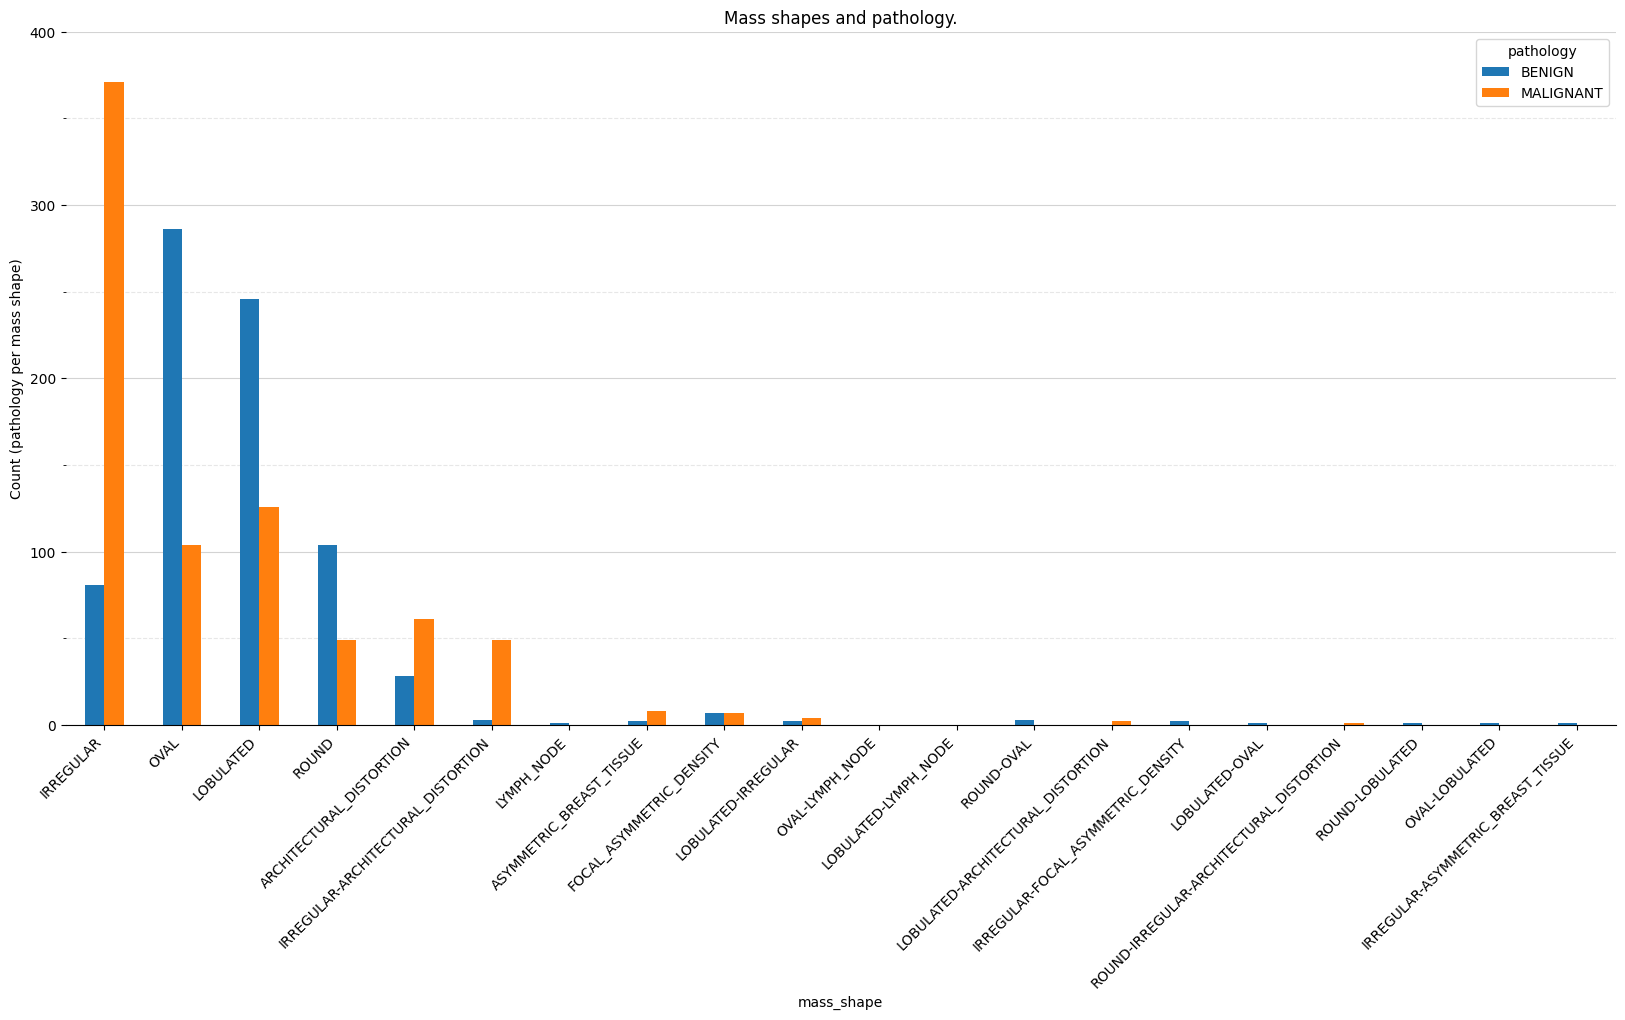

In [35]:
plot_df = mass_all_df.groupby(["mass_shape"])["pathology"].value_counts().unstack()
plot_df.drop(columns=["BENIGN_WITHOUT_CALLBACK"], inplace=True)
plot_df = plot_df.reindex(x_labels)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
plot_df.plot.bar(ax=ax)

ax.set_title("Mass shapes and pathology.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (pathology per mass shape)")
ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 450, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

In [36]:
calc_types = [calc for calc in calc_all_df["calc_type"].unique() if str(calc) != "nan"]
calc_types

['AMORPHOUS',
 'PLEOMORPHIC',
 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
 'PUNCTATE',
 'COARSE',
 'VASCULAR',
 'FINE_LINEAR_BRANCHING',
 'LARGE_RODLIKE',
 'PUNCTATE-LUCENT_CENTER',
 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULAR-PUNCTATE',
 'ROUND_AND_REGULAR-EGGSHELL',
 'PUNCTATE-PLEOMORPHIC',
 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
 'DYSTROPHIC',
 'LUCENT_CENTER',
 'AMORPHOUS-PLEOMORPHIC',
 'ROUND_AND_REGULAR',
 'VASCULAR-COARSE-LUCENT_CENTERED',
 'COARSE-ROUND_AND_REGULAR',
 'COARSE-PLEOMORPHIC',
 'LUCENT_CENTERED',
 'VASCULAR-COARSE',
 'ROUND_AND_REGULAR-PUNCTATE',
 'ROUND_AND_REGULAR-LUCENT_CENTER',
 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
 'SKIN',
 'LUCENT_CENTER-PUNCTATE',
 'SKIN-PUNCTATE',
 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
 'MILK_OF_CALCIUM',
 'PLEOMORPHIC-PLEOMORPHIC',
 'SKIN-COARSE-ROUND_AND_REGULAR',
 'AMORPHOUS-ROUND_AND_REGULAR',
 'ROUND_AND_REGULAR-PLEOMORPHIC',
 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
 'ROUND_AND_REGULAR-AMORPHOUS',
 'COARSE-ROUND_AND_REGULAR-L

In [37]:
calc_all_df["calc_type"].isnull().sum()

24

In [38]:
calc_type_singlelabel = [calc for calc in calc_types if "-" not in calc]
calc_type_singlelabel

['AMORPHOUS',
 'PLEOMORPHIC',
 'PUNCTATE',
 'COARSE',
 'VASCULAR',
 'FINE_LINEAR_BRANCHING',
 'LARGE_RODLIKE',
 'DYSTROPHIC',
 'LUCENT_CENTER',
 'ROUND_AND_REGULAR',
 'LUCENT_CENTERED',
 'SKIN',
 'MILK_OF_CALCIUM',
 'EGGSHELL']

C:\Users\b3nni\AppData\Local\Temp\ipykernel_10756\2705864446.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")


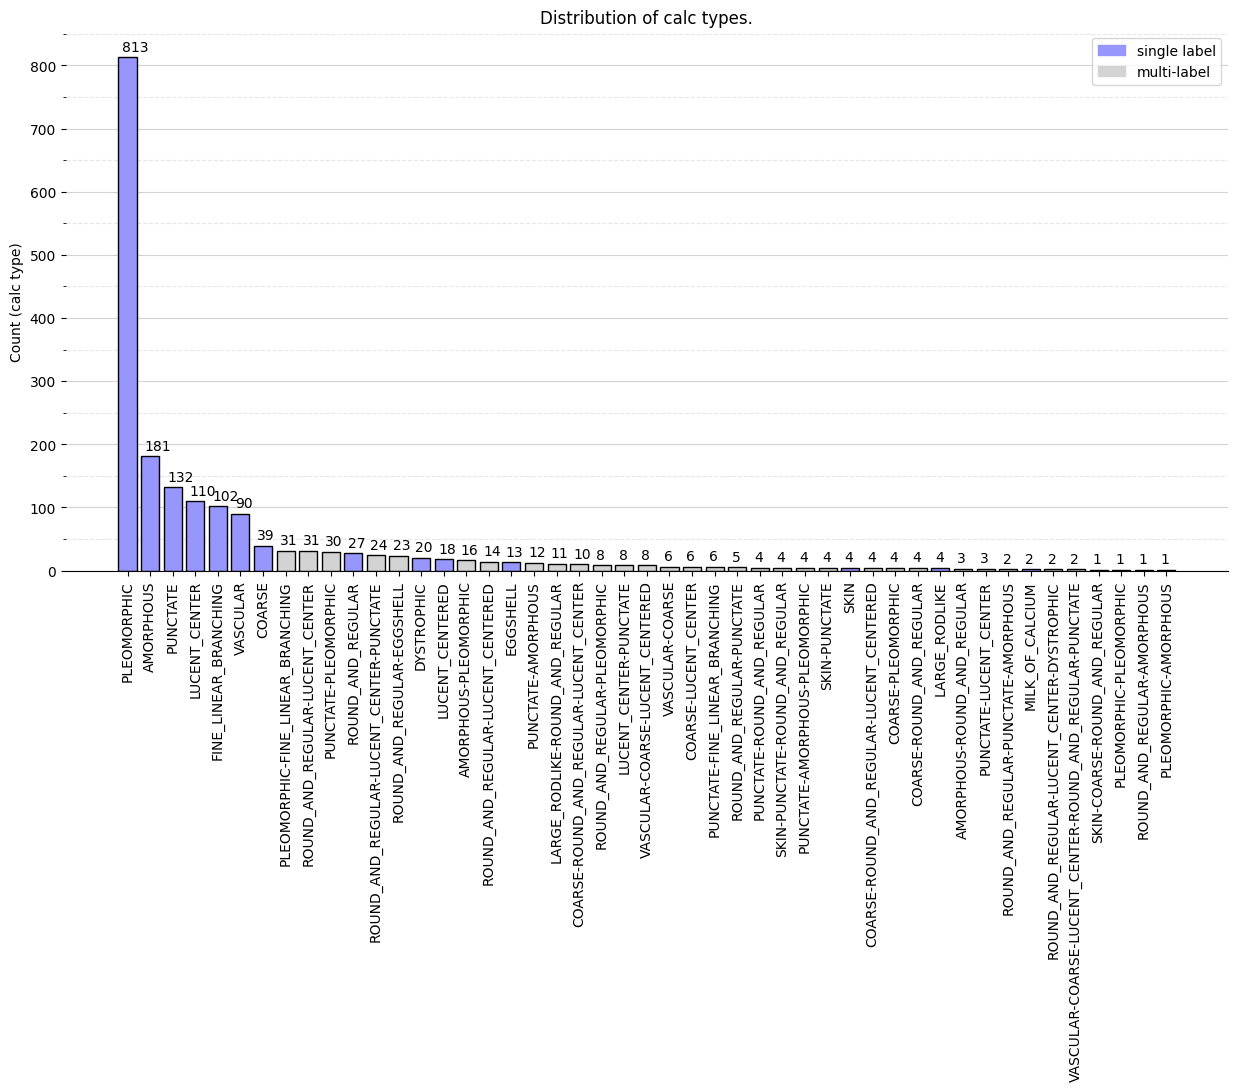

In [39]:
plot_df = calc_all_df["calc_type"].value_counts().to_frame()


# Create colour dictionary
color_dict = dict((calc, "#d3d3d3") for calc in calc_types)
for k, v in color_dict.items():
    if k in calc_type_singlelabel:
        color_dict[k] = "#9696fd"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

# Plot bars one by one in order to set the colours.
for row in plot_df.itertuples():
    ax.bar(x=row.Index, height=row.count, color=color_dict[row.Index], edgecolor="black")

# Plot values
for i, v in enumerate(plot_df["count"]):
    ax.text(x=(i-0.25), y=(v + 10), s=str(v), color="black")
    
ax.set_title("Distribution of calc types.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (calc type)")
ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")
ax.yaxis.set_ticks(np.arange(0, 850, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

# Add legend
colors = {"single label": "#9696fd", "multi-label":"#d3d3d3"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

In [40]:
calc_path_00034 = [
    "data/Calc/Train/Calc-Training_P_00034_RIGHT_CC_FULL.dcm",
    "data/Calc/Train/Calc-Training_P_00034_RIGHT_CC_CROP_2.dcm",
    "data/Calc/Train/Calc-Training_P_00034_RIGHT_CC_MASK_2.dcm"
]

mass_path_00034 = [
"data/Mass/Train/Mass-Training_P_00034_RIGHT_CC_FULL.dcm",
"data/Mass/Train/Mass-Training_P_00034_RIGHT_CC_CROP_1.dcm",
"data/Mass/Train/Mass-Training_P_00027_RIGHT_MLO_MASK_1.dcm"

    
]

calc_ds = [pydicom.dcmread(calc_path_00034[i]) for i in range(len(calc_path_00034))]
mass_ds = [pydicom.dcmread(mass_path_00034[i]) for i in range(len(mass_path_00034))]

calc_arr = [_ds.pixel_array for _ds in calc_ds]
mass_arr = [_ds.pixel_array for _ds in mass_ds]

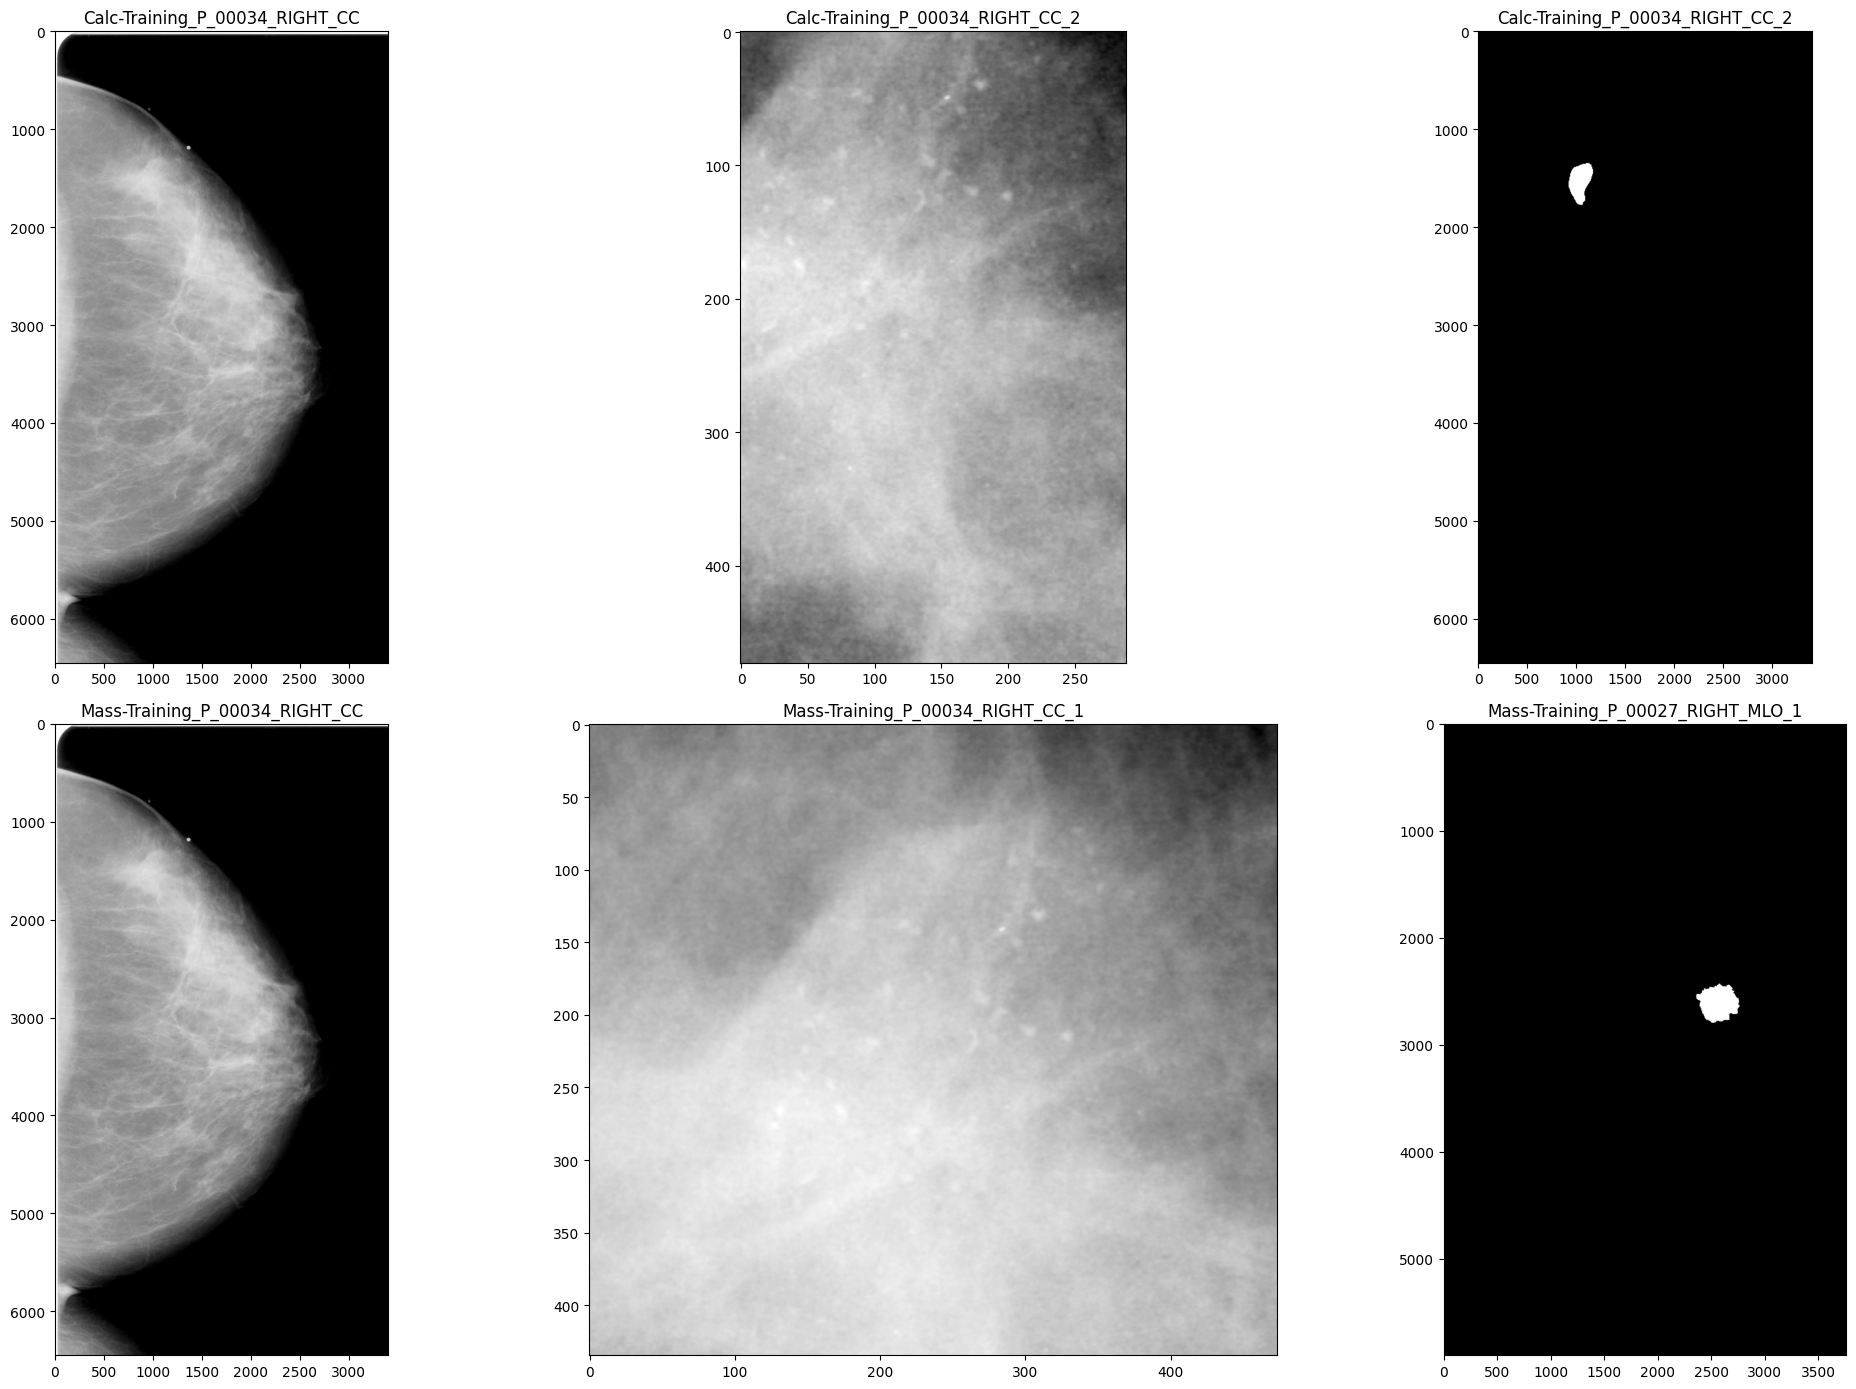

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (22, 14))

for i in range(3):
    ax[0][i].imshow(calc_arr[i], cmap="gray")
    ax[0][i].set_title(f"{calc_ds[i].PatientID}")
    
    ax[1][i].imshow(mass_arr[i], cmap="gray")
    ax[1][i].set_title(f"{mass_ds[i].PatientID}")
    
plt.tight_layout()

In [42]:
calc_all_df["identifier"].value_counts()

identifier
P_01838_LEFT_MLO     7
P_00112_RIGHT_MLO    7
P_01408_LEFT_CC      6
P_00112_RIGHT_CC     6
P_01437_LEFT_MLO     6
                    ..
P_00883_RIGHT_CC     1
P_00882_LEFT_MLO     1
P_00882_LEFT_CC      1
P_00880_RIGHT_CC     1
P_02501_RIGHT_MLO    1
Name: count, Length: 1511, dtype: int64

In [43]:
calc_path_full_00112 = "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_FULL.dcm"

calc_path_crop_00112 = [ 
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_1.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_2.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_3.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_4.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_5.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_6.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_7.dcm"
]

calc_path_mask_00112 = [
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_1.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_2.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_3.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_4.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_5.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_6.dcm",
    "data/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_7.dcm"
]

In [44]:
calc_crop_ds = [pydicom.dcmread(calc_path_crop_00112[i]) for i in range(len(calc_path_crop_00112))]
calc_mask_ds = [pydicom.dcmread(calc_path_mask_00112[i]) for i in range(len(calc_path_mask_00112))]
calc_full_ds = pydicom.dcmread(calc_path_full_00112)

calc_crop_arr = [_ds.pixel_array for _ds in calc_crop_ds]
calc_mask_arr = [_ds.pixel_array for _ds in calc_mask_ds]
calc_full_arr = calc_full_ds.pixel_array

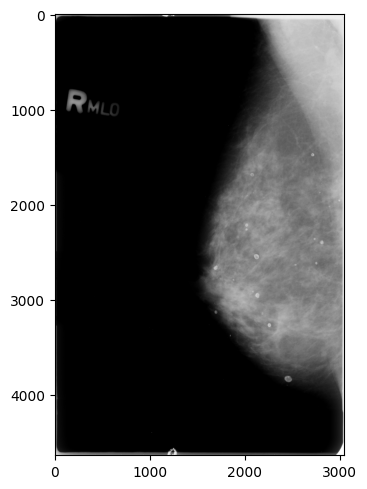

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (5, 5))

ax.imshow(calc_full_arr, cmap="gray")

plt.tight_layout()

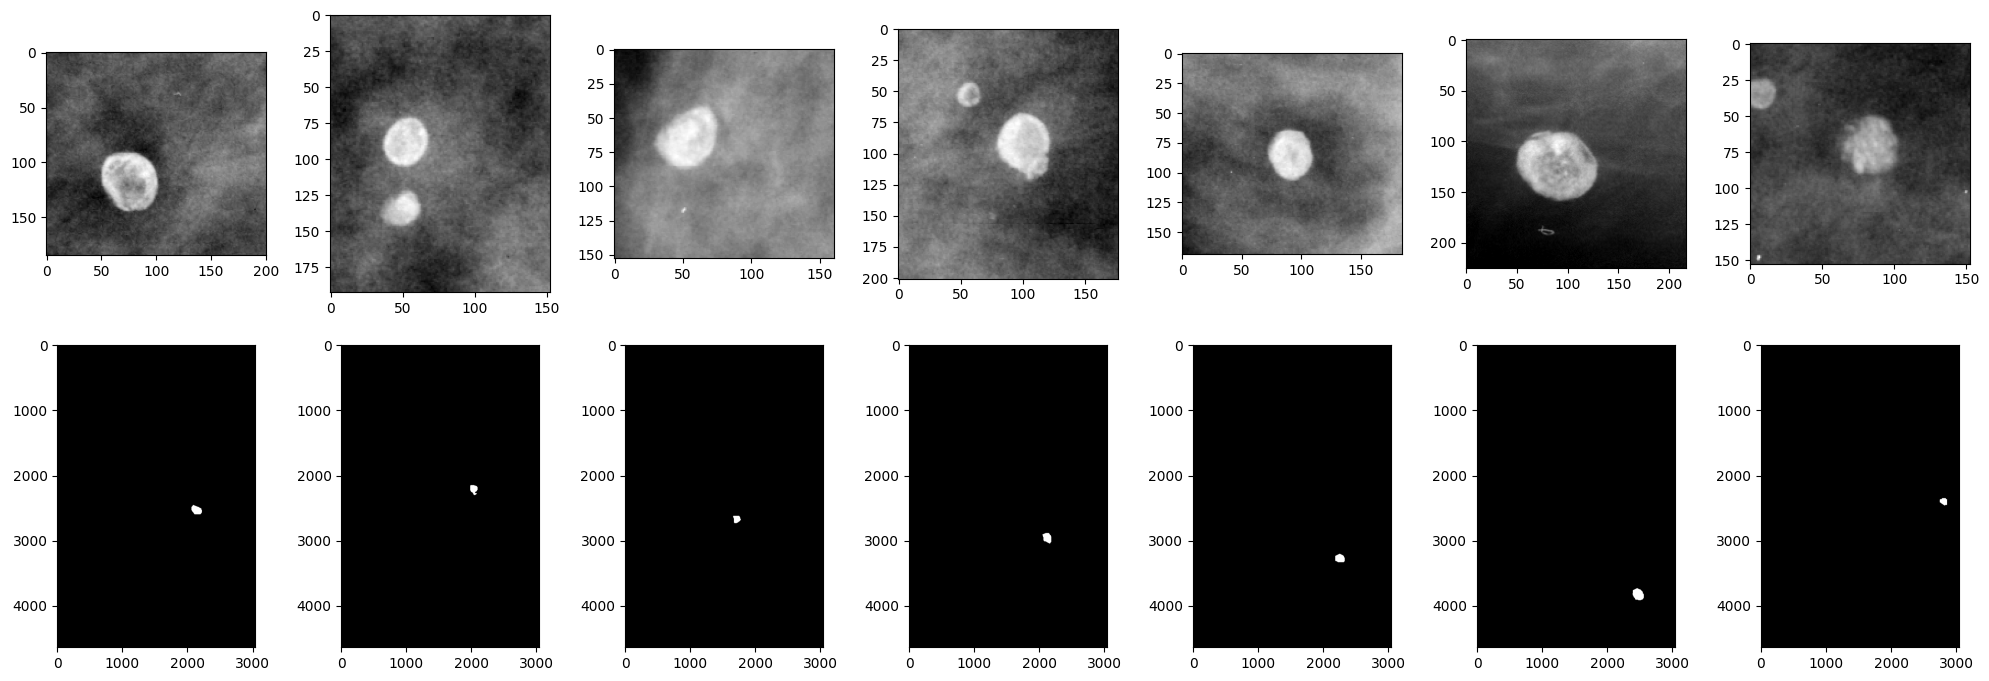

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=7, figsize = (20, 7))


for i in range(len(calc_crop_ds)):
    ax[0][i].imshow(calc_crop_arr[i], cmap="gray")
    ax[1][i].imshow(calc_mask_arr[i], cmap="gray")

plt.tight_layout()

In [47]:
calc_path_full_01838 = "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_FULL.dcm"

calc_path_crop_01838 = [
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_1.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_2.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_3.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_4.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_5.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_6.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_7.dcm"
]

calc_path_mask_01838 = [
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_1.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_2.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_3.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_4.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_5.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_6.dcm",
    "data/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_7.dcm"
]

In [48]:
calc_crop_ds = [pydicom.dcmread(calc_path_crop_01838[i]) for i in range(len(calc_path_crop_01838))]
calc_mask_ds = [pydicom.dcmread(calc_path_mask_01838[i]) for i in range(len(calc_path_mask_01838))]
calc_full_ds = pydicom.dcmread(calc_path_full_01838)

calc_crop_arr = [_ds.pixel_array for _ds in calc_crop_ds]
calc_mask_arr = [_ds.pixel_array for _ds in calc_mask_ds]
calc_full_arr = calc_full_ds.pixel_array

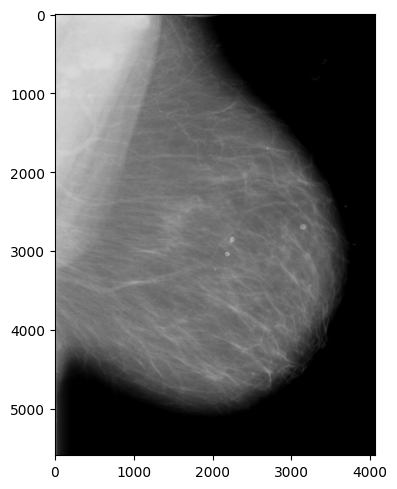

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (5, 5))

ax.imshow(calc_full_arr, cmap="gray")

plt.tight_layout()

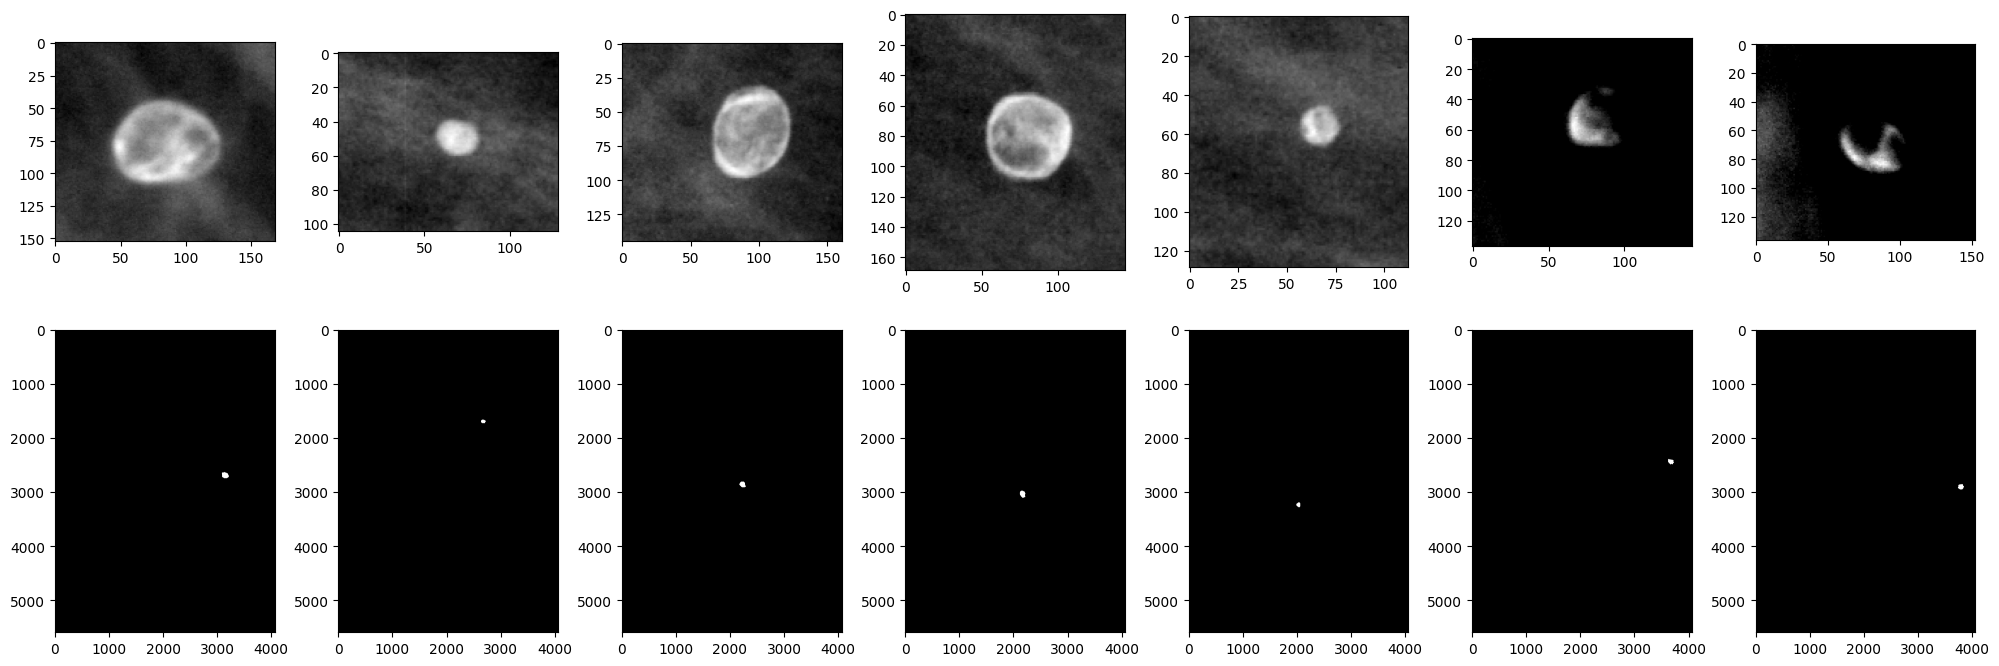

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=7, figsize = (20, 7))


for i in range(len(calc_crop_ds)):
    ax[0][i].imshow(calc_crop_arr[i], cmap="gray")
    ax[1][i].imshow(calc_mask_arr[i], cmap="gray")

plt.tight_layout()

In [52]:
selected_paths = ["data/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL.dcm",
                  "data/Mass/Train/Mass-Training_P_00009_RIGHT_MLO_FULL.dcm",
                  "data/Mass/Train/Mass-Training_P_00572_RIGHT_CC_FULL.dcm",
                  "data/Mass/Train/Mass-Training_P_00146_RIGHT_CC_FULL.dcm",
                  "data/Mass/Train/Mass-Training_P_00710_LEFT_MLO_FULL.dcm",
                  "data/Mass/Train/Mass-Training_P_01343_LEFT_CC_FULL.dcm"]

ds = [pydicom.dcmread(selected_paths[i]) for i in range(len(selected_paths))]

arr = [_ds.pixel_array for _ds in ds]

# Paths of corresponding masks
mask_paths = ["data/Mass/Train/Mass-Training_P_00001_LEFT_CC_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_00009_RIGHT_MLO_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_00572_RIGHT_CC_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_00146_RIGHT_CC_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_00710_LEFT_MLO_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_01343_LEFT_CC_MASK_1.dcm",
              "data/Mass/Train/Mass-Training_P_01343_LEFT_CC_MASK_2.dcm"]

ds_masks = [pydicom.dcmread(mask_paths[i]) for i in range(len(mask_paths))]

arr_masks = [_ds.pixel_array for _ds in ds_masks]

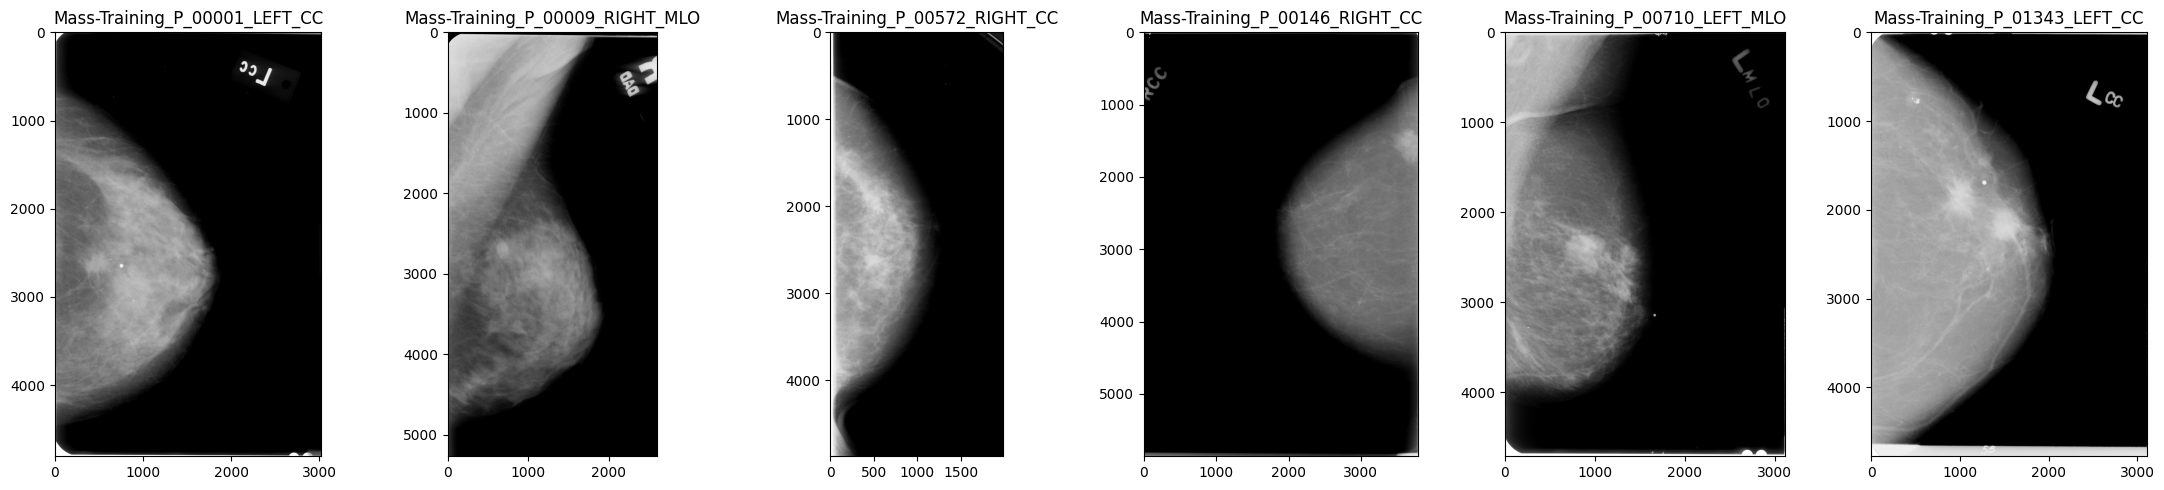

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=len(selected_paths), figsize = (22, 5))

for i in range(len(selected_paths)):
    ax[i].imshow(arr[i], cmap="gray")
    ax[i].set_title(f"{ds[i].PatientID}")
    
plt.tight_layout()

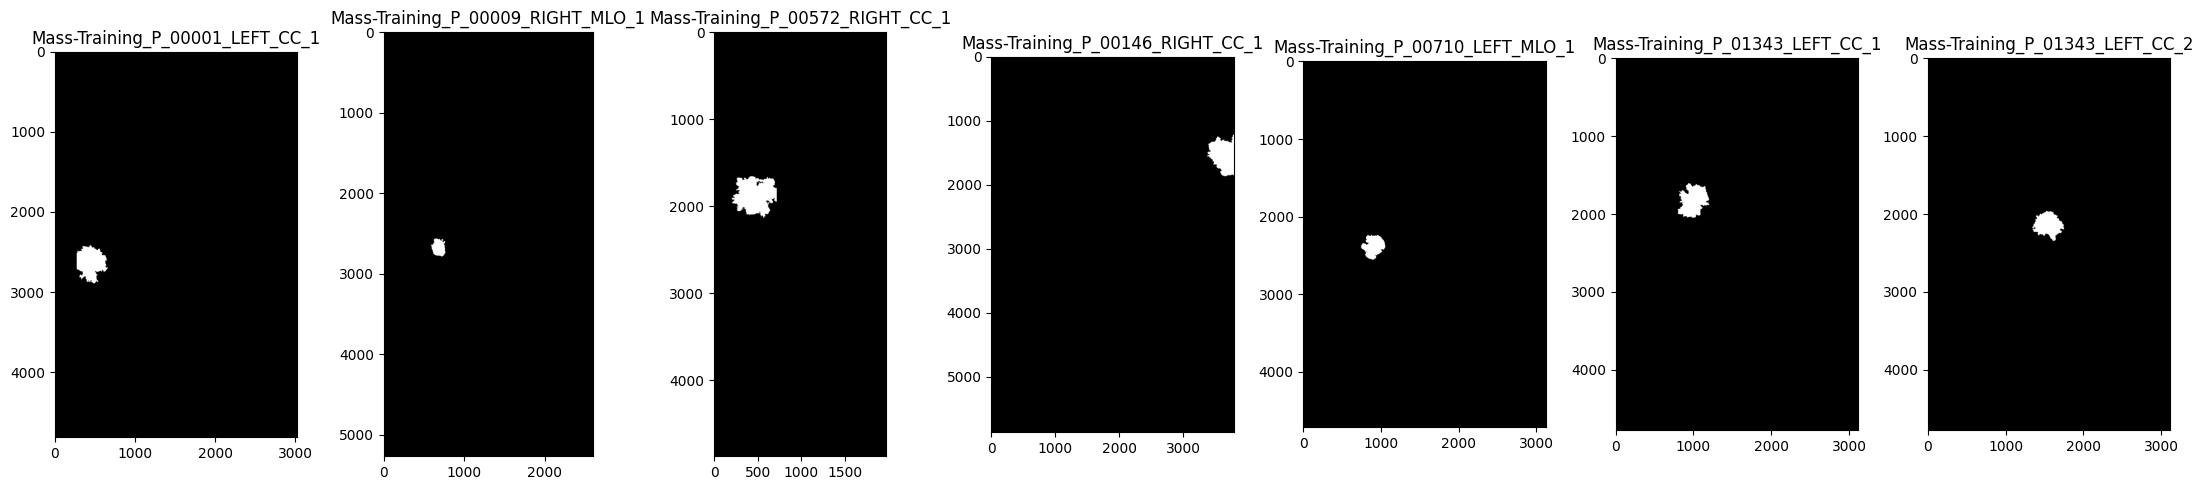

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=len(mask_paths), figsize = (22, 5))

for i in range(len(mask_paths)):
    ax[i].imshow(arr_masks[i], cmap="gray")
    ax[i].set_title(f"{ds_masks[i].PatientID}")
    
plt.tight_layout()

In [56]:
for a in arr:
    print("Shape:", a.shape)
    print("Dimensions:", a.ndim)
    print("Type:", type(a))
    print("Data type:", a.dtype)
    print(f"min value, max value: {a.min(), a.max()}")
    print("---")

Shape: (4808, 3024)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65535)
---
Shape: (5266, 2596)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65534)
---
Shape: (4876, 1981)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65535)
---
Shape: (5864, 3784)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65535)
---
Shape: (4712, 3120)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65535)
---
Shape: (4776, 3112)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint16
min value, max value: (0, 65535)
---
